In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from sklearn.preprocessing import LabelEncoder as label_encoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [147]:
data=pd.read_csv('/content/car_price_prediction.csv')
data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


## **Explore Data**

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [149]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [150]:
data.drop_duplicates(inplace=True)

In [151]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## **Analysis**

In [152]:
for i in data.columns:
  print(i,":",data[i].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


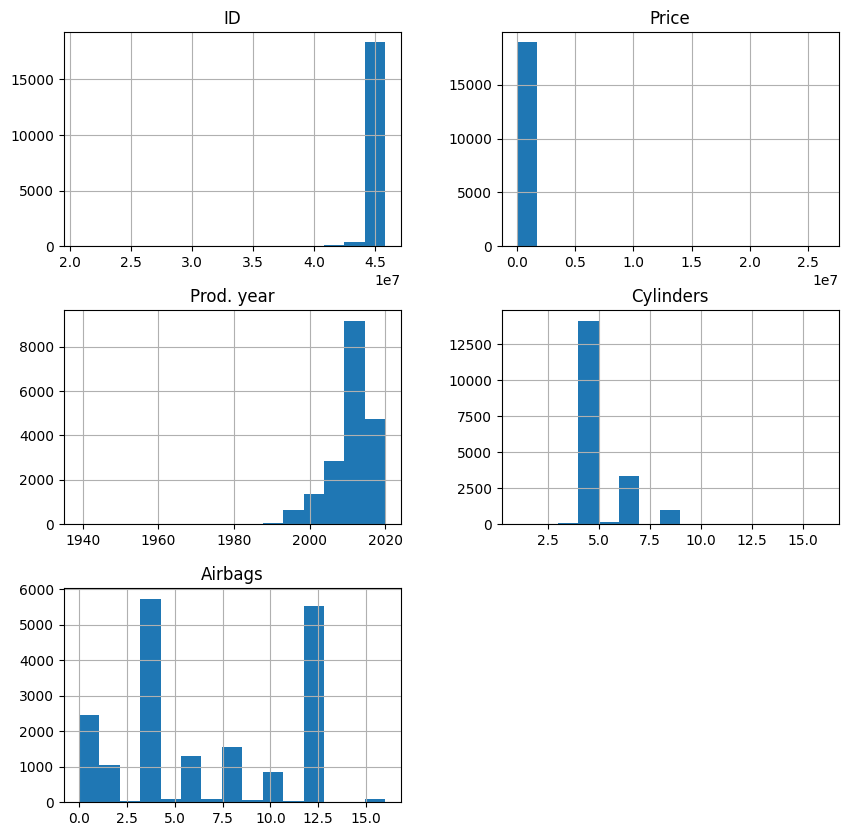

In [153]:
data.hist(bins=15,figsize=(10,10))
plt.show()

In [154]:
top10=data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

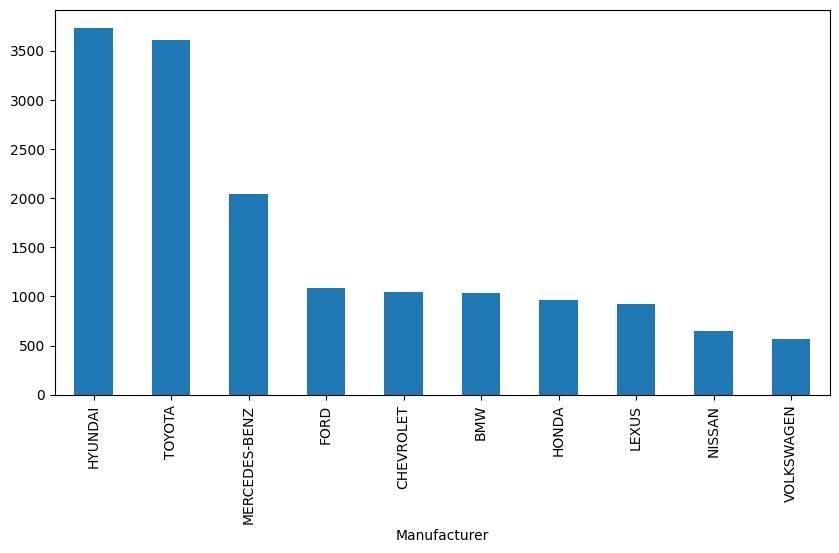

In [155]:
top10.plot(kind='bar',figsize=(10,5))
plt.show()

In [156]:
for i in (top10.index):
 top10Mean=data[data['Manufacturer']==i]['Price'].mean()
 print(i,":",top10Mean)

HYUNDAI : 22306.00080450523
TOYOTA : 14302.447864669994
MERCEDES-BENZ : 18590.331375428294
FORD : 15411.85018382353
CHEVROLET : 14894.873925501433
BMW : 20609.468146718147
HONDA : 14162.073958333332
LEXUS : 20052.594390507013
NISSAN : 9835.84031007752
VOLKSWAGEN : 11471.77408056042


<Axes: >

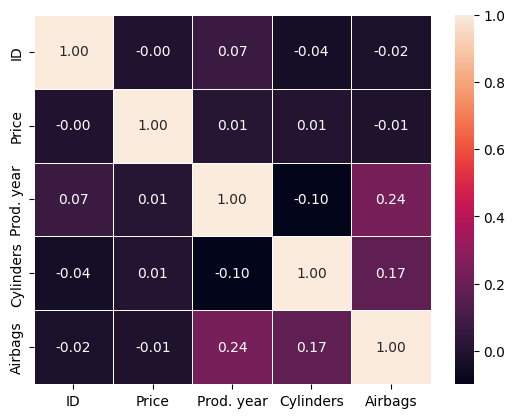

In [157]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True,fmt='.2f', linewidth=0.5)

In [158]:
object_data = data.select_dtypes(include=['object'])

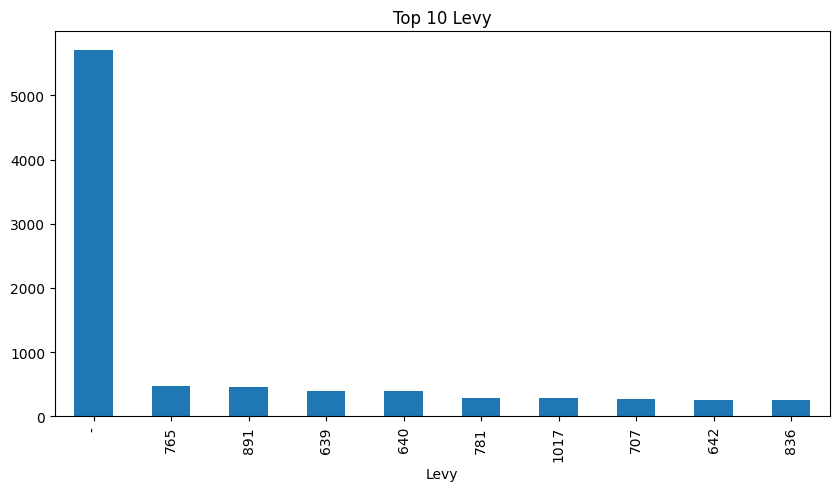

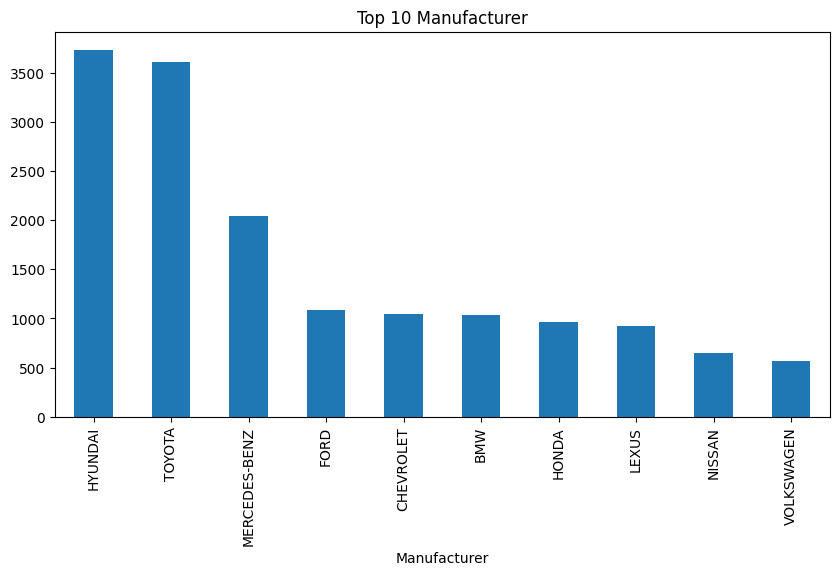

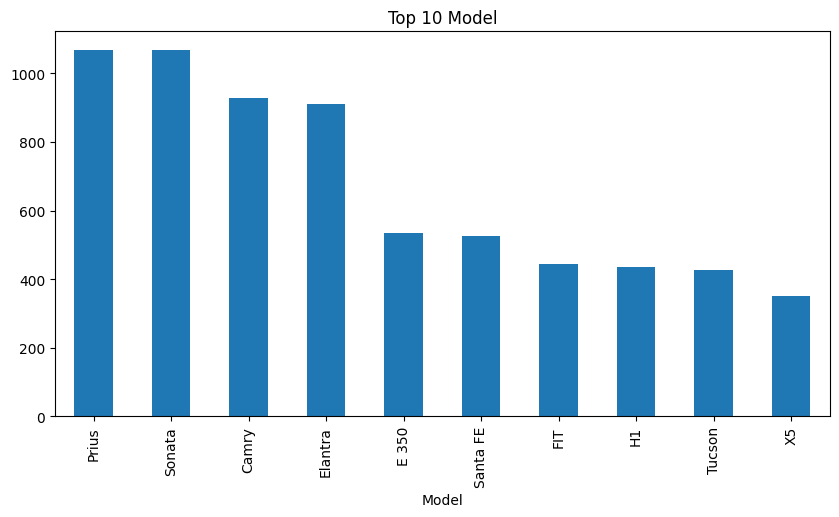

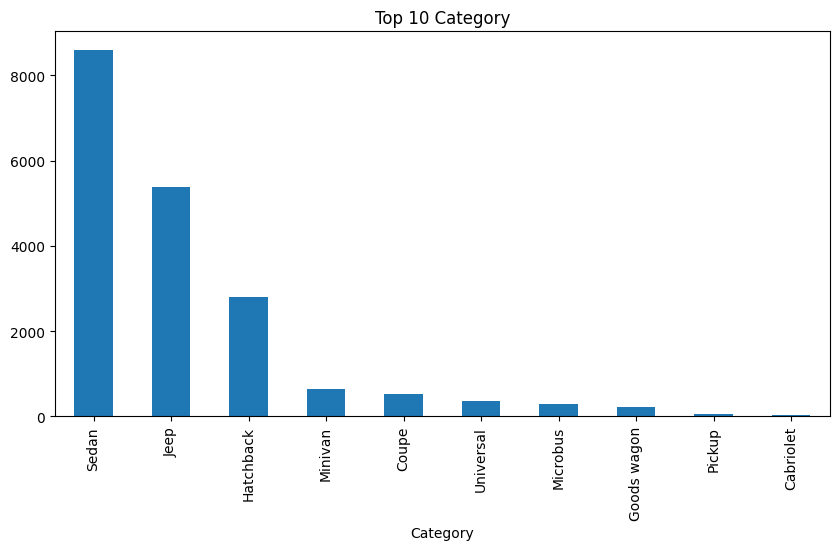

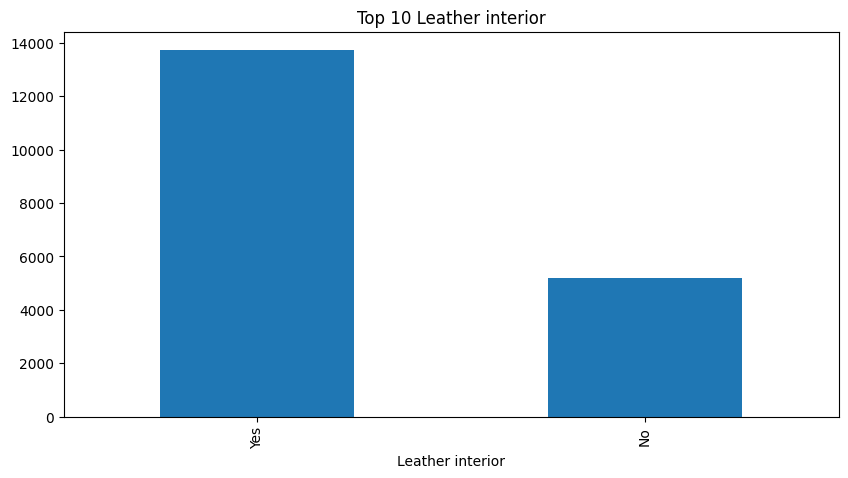

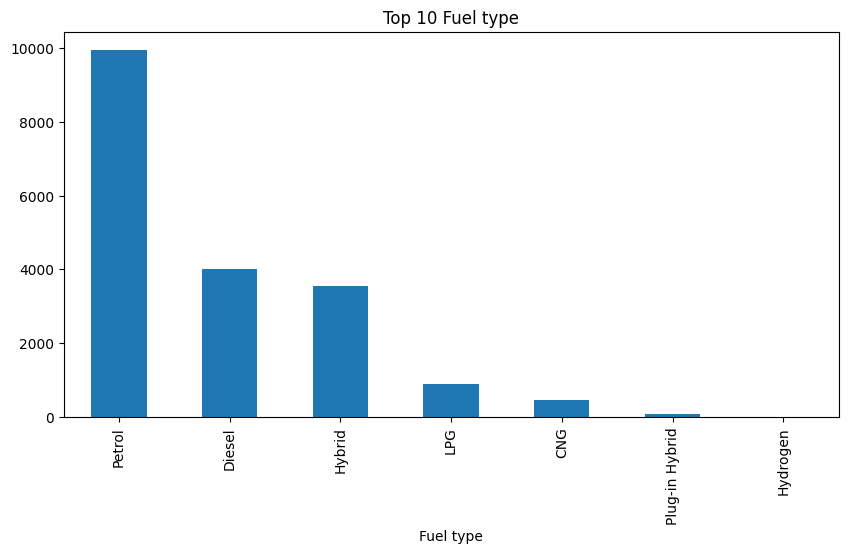

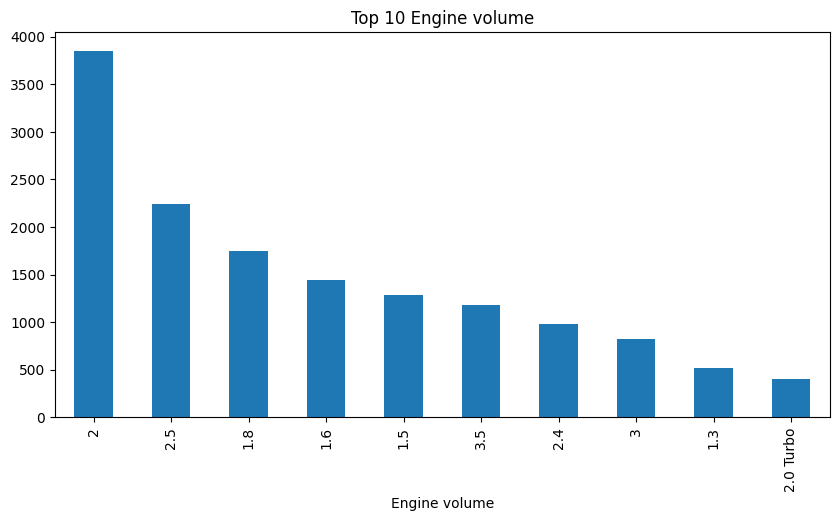

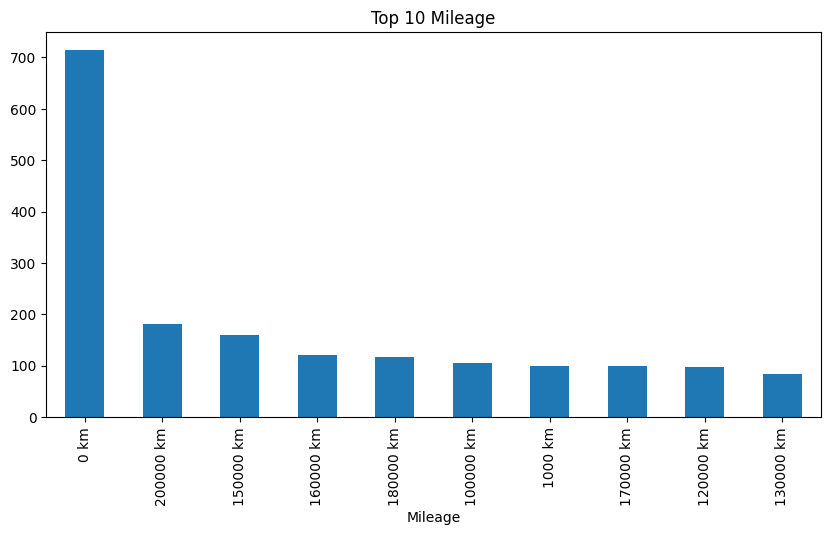

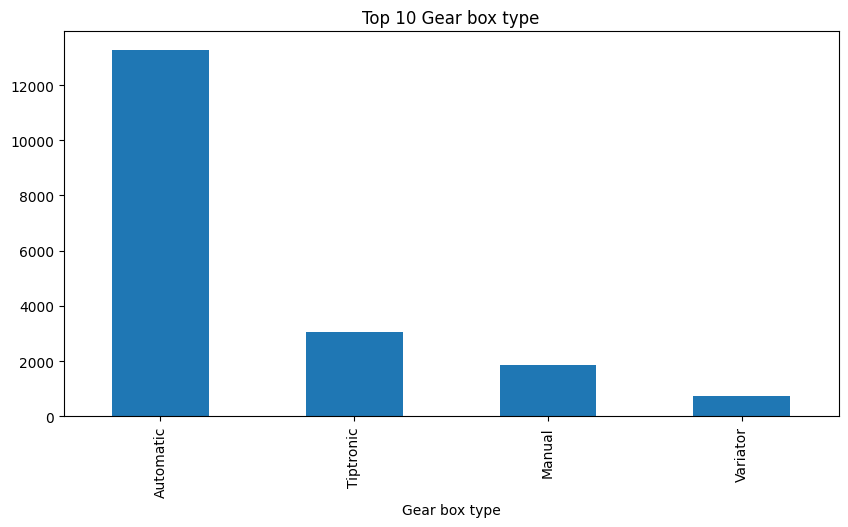

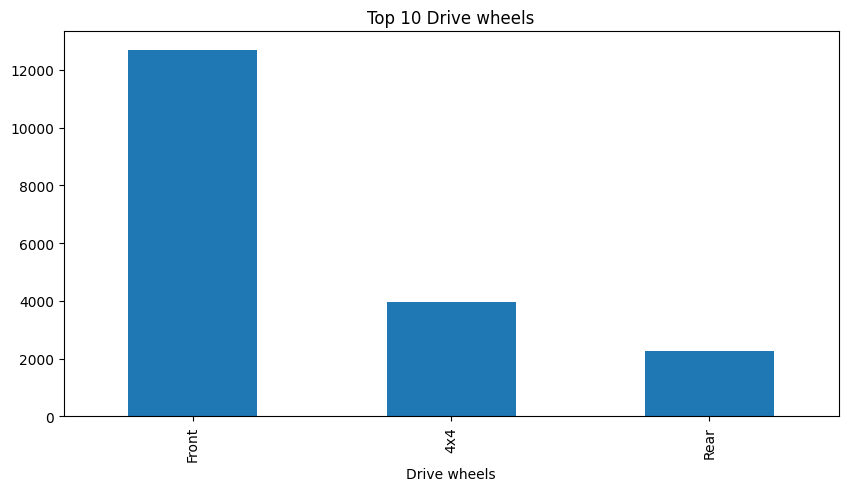

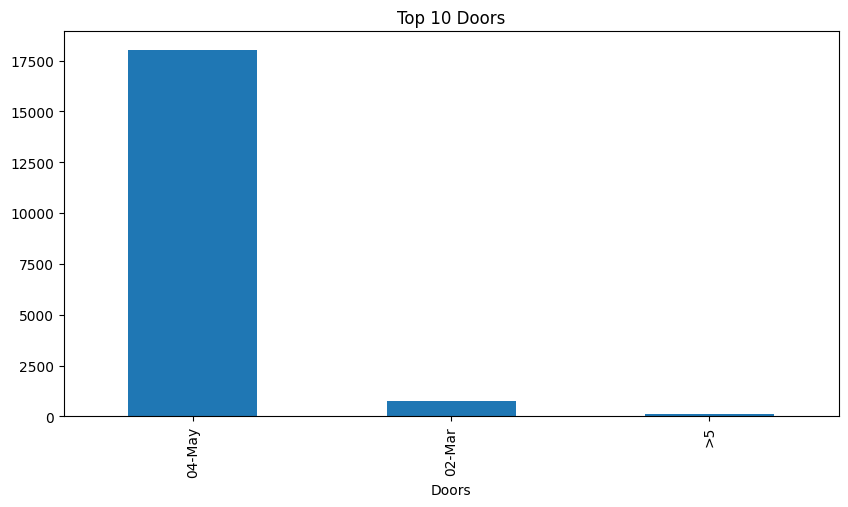

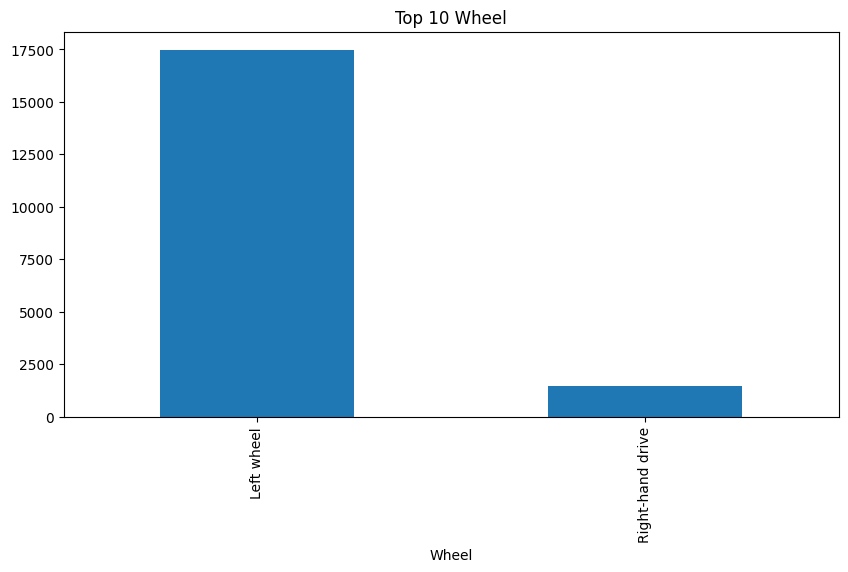

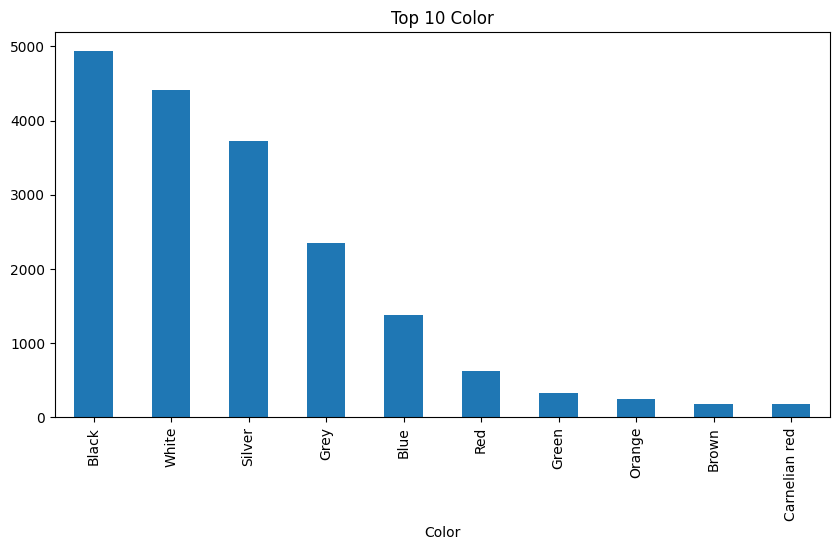

In [159]:
for i in object_data.columns:
  plt.figure(figsize=(10,5))
  top10all=object_data[i].value_counts().sort_values(ascending=False)[:10]
  top10all.plot(kind='bar')
  plt.title('Top 10'+' '+i)
  plt.show()

## **Preprocessing**

In [160]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [161]:
data.drop(['ID','Doors'],axis=1,inplace=True)

In [162]:
currTime=datetime.datetime.now()
data['Prod_age']=currTime.year - data['Prod. year']

In [163]:
data.drop(['Prod. year'],axis=1,inplace=True)

In [164]:
data.Levy.replace({'-':'0'},inplace=True)
data['Levy']=data['Levy'].astype(int)

In [165]:
data['Mileage']=data['Mileage'].str.split().str[0]
data['Mileage']=data['Mileage'].astype(int)

In [166]:
data['Engine volume']=data['Engine volume'].str.split().str[0]
data['Engine volume']=data['Engine volume'].astype(float)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Prod_age          18924 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usa

In [168]:
numeric_data = data.select_dtypes(include=['number'])
for i in numeric_data:
  q1=numeric_data[i].quantile(0.25)
  q3=numeric_data[i].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  outlier=((numeric_data[i]<lower) | (numeric_data[i]>upper)).sum()
  total=numeric_data[i].shape[0]
  print(f'Percentage of outliers in {i} are: {outlier}--{round(100*(outlier)/total,2)}%')
  if outlier>0:
    data=data.loc[(data[i]<=upper)&(data[i]>=lower)]

Percentage of outliers in Price are: 1055--5.57%
Percentage of outliers in Levy are: 160--0.85%
Percentage of outliers in Engine volume are: 1358--7.18%
Percentage of outliers in Mileage are: 635--3.36%
Percentage of outliers in Cylinders are: 4765--25.18%
Percentage of outliers in Airbags are: 0--0.0%
Percentage of outliers in Prod_age are: 962--5.08%


In [169]:
la = label_encoder()
for column in data.columns:
  if data[column].dtype=='object':
    data[column] = la.fit_transform(data[column].astype(str))

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12281 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12281 non-null  int64  
 1   Levy              12281 non-null  int64  
 2   Manufacturer      12281 non-null  int64  
 3   Model             12281 non-null  int64  
 4   Category          12281 non-null  int64  
 5   Leather interior  12281 non-null  int64  
 6   Fuel type         12281 non-null  int64  
 7   Engine volume     12281 non-null  float64
 8   Mileage           12281 non-null  int64  
 9   Cylinders         12281 non-null  float64
 10  Gear box type     12281 non-null  int64  
 11  Drive wheels      12281 non-null  int64  
 12  Wheel             12281 non-null  int64  
 13  Color             12281 non-null  int64  
 14  Airbags           12281 non-null  int64  
 15  Prod_age          12281 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.6 MB

## **Model**

In [184]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [186]:
model_lg=LinearRegression()
model_DTR=DecisionTreeRegressor()
model_RFR=RandomForestRegressor()
model_GBR=GradientBoostingRegressor()
model_XGB=XGBRegressor()

In [195]:
columns=['Linear Regression','Decision Tree Regressor','Random Forest Classifier','Gradient Boosting Classifier','XGB Regressor']
result1=[]
result2=[]
result3=[]

In [196]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test, pre)
    rmse=np.sqrt(mean_squared_error(y_test, pre))
    sc=model.score(x_train,y_train)

    result1.append(r2)
    result2.append(rmse)
    result3.append(sc)

    print(model)
    print('Score: ', sc)
    print('R2Score: ', r2)
    print('RMSE: ', rmse)

In [197]:
cal(model_lg)

LinearRegression()
Score:  0.24196738073084634
R2Score:  0.24280980807714336
RMSE:  9776.407294752698


In [198]:
cal(model_DTR)

DecisionTreeRegressor()
Score:  0.9974319075598714
R2Score:  0.57664266278116
RMSE:  7310.2182292130965


In [199]:
cal(model_RFR)

RandomForestRegressor()
Score:  0.9690324887390022
R2Score:  0.7637359628448148
RMSE:  5461.043134416883


In [200]:
cal(model_GBR)

GradientBoostingRegressor()
Score:  0.6981918590773857
R2Score:  0.6602688270672508
RMSE:  6548.540168119476


In [201]:
cal(model_XGB)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Score:  0.921672258498903
R2Score:  0.7567590621684823
RMSE:  5541.089068006174


In [202]:
final_result=pd.DataFrame({'Model':columns,'R2Score':result1,'RMSE':result2, 'Score':result3})
final_result

,Model,R2Score,RMSE,Score
0,Linear Regression,0.242810,9776.407295,0.241967
1,Decision Tree Regressor,0.576643,7310.218229,0.997432
2,Random Forest Classifier,0.763736,5461.043134,0.969032
3,Gradient Boosting Classifier,0.660269,6548.540168,0.698192
4,XGB Regressor,0.756759,5541.089068,0.921672


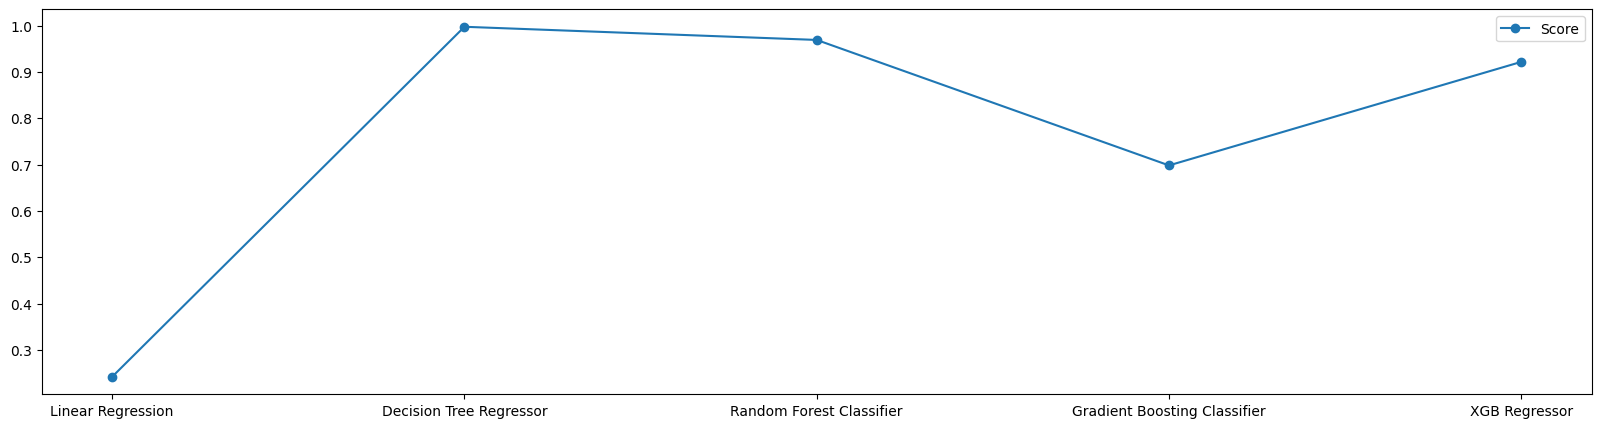

In [214]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Model, result3, label='Score', marker='o')
plt.legend()
plt.show()

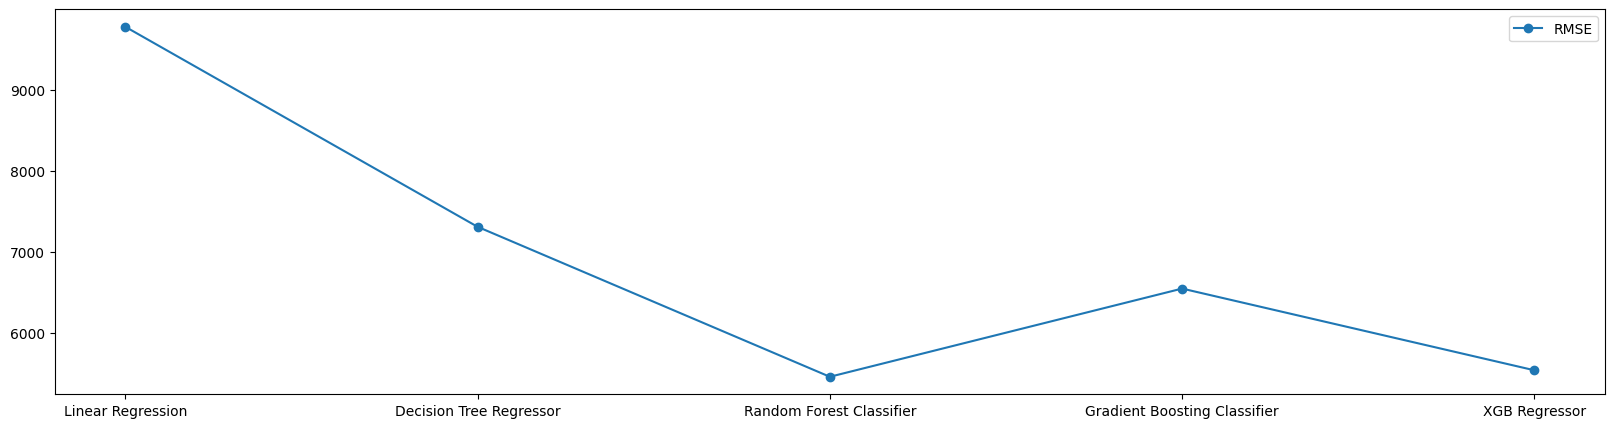

In [213]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Model, result2, label='RMSE', marker='o')
plt.legend()
plt.show()

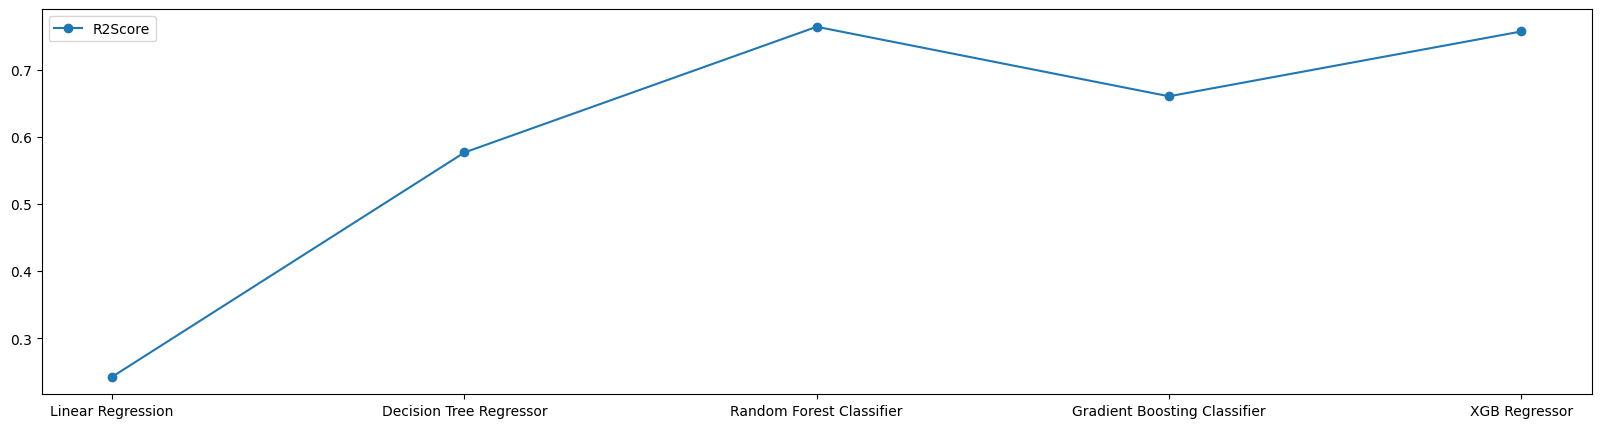

In [212]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Model, result1, label='R2Score', marker='o')
plt.legend()
plt.show()